<a href="https://colab.research.google.com/github/Nikhil-1503/improved-mj-pj/blob/master/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip drive/MyDrive/cov19.zip

Streaming output truncated to the last 5000 lines.
  inflating: cov19/CovidDataset/Train/Covid/COVID-2728.png  
  inflating: cov19/CovidDataset/Train/Covid/COVID-2729.png  
  inflating: cov19/CovidDataset/Train/Covid/COVID-2730.png  
  inflating: cov19/CovidDataset/Train/Covid/COVID-2731.png  
  inflating: cov19/CovidDataset/Train/Covid/COVID-2732.png  
  inflating: cov19/CovidDataset/Train/Covid/COVID-2733.png  
  inflating: cov19/CovidDataset/Train/Covid/COVID-2734.png  
  inflating: cov19/CovidDataset/Train/Covid/COVID-2735.png  
  inflating: cov19/CovidDataset/Train/Covid/COVID-2736.png  
  inflating: cov19/CovidDataset/Train/Covid/COVID-2737.png  
  inflating: cov19/CovidDataset/Train/Covid/COVID-2738.png  
  inflating: cov19/CovidDataset/Train/Covid/COVID-2739.png  
  inflating: cov19/CovidDataset/Train/Covid/COVID-2740.png  
  inflating: cov19/CovidDataset/Train/Covid/COVID-2741.png  
  inflating: cov19/CovidDataset/Train/Covid/COVID-2742.png  
  inflating: cov19/CovidDataset/Tr

In [3]:
train_path = "cov19/CovidDataset/Train"
valid_path = "cov19/CovidDataset/Val"
test_path = "cov19/CovidDataset/Test"

In [4]:
import pandas as pd
import numpy as np
import os
import shutil
import glob
import matplotlib.pyplot as plt

In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import vgg16
from keras.models import Model
from keras.layers import Dense, MaxPool2D, Conv2D
import keras

In [6]:
train_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input , zoom_range= 0.2, horizontal_flip= True, shear_range= 0.2 , rescale= 1./255)
train = train_data_gen.flow_from_directory(directory= train_path , target_size=(224,224))

Found 6220 images belonging to 2 classes.


In [7]:
validation_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input , rescale= 1./255 )
valid = validation_data_gen.flow_from_directory(directory= valid_path , target_size=(224,224))

Found 504 images belonging to 2 classes.


In [8]:
test_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input, rescale= 1./255 )
test = train_data_gen.flow_from_directory(directory= test_path , target_size=(224,224), shuffle= False)

Found 516 images belonging to 2 classes.


In [9]:
train.class_indices

{'Covid': 0, 'Normal': 1}

In [10]:
class_type = {0:'Covid',  1 : 'Normal'}

In [11]:
t_img , label = train.next()

In [12]:
def plotImages(img_arr, label):

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


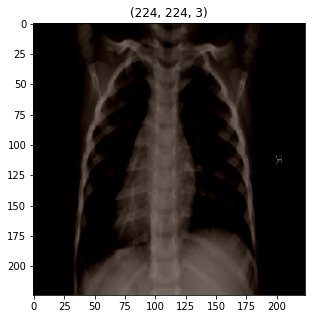

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


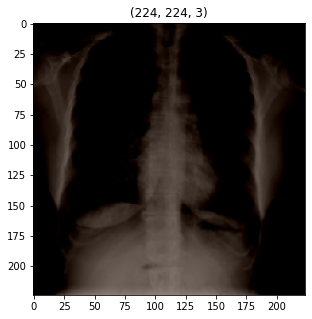

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


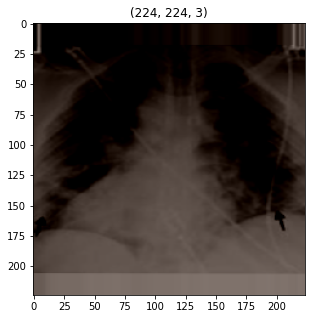

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


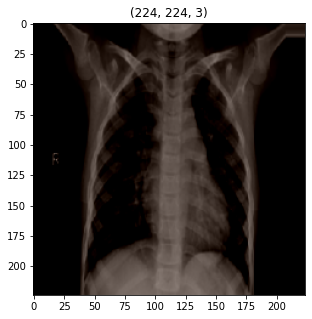

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


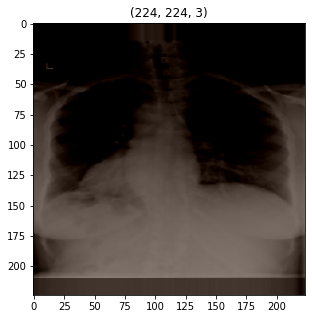

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


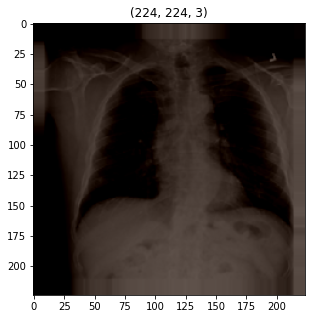

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


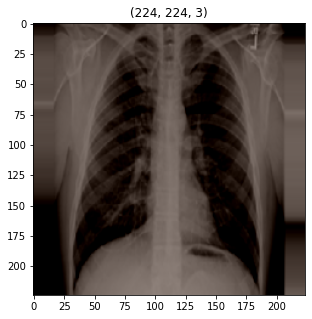

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


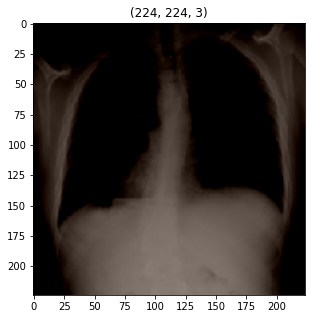

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


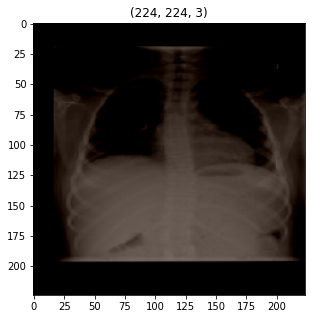

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


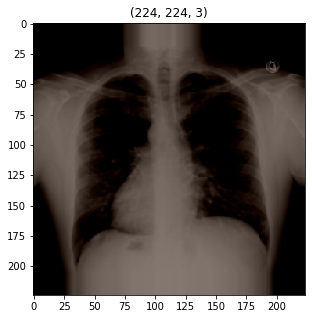

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


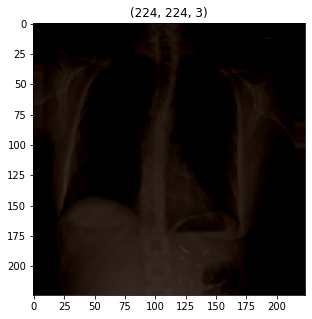

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


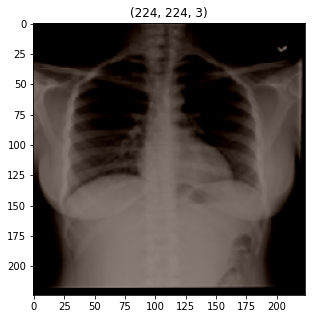

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


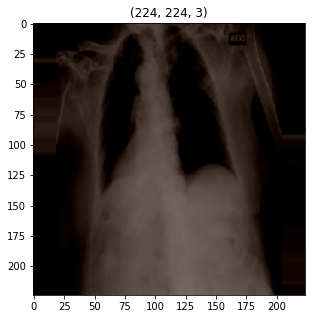

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


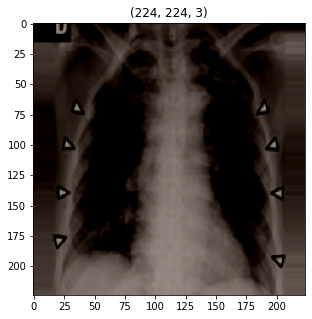

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


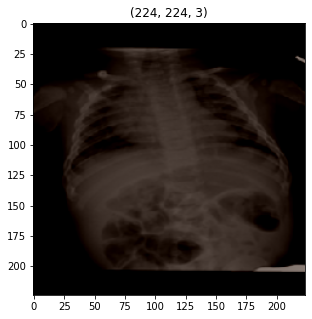

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


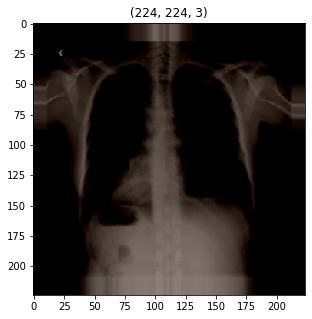

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


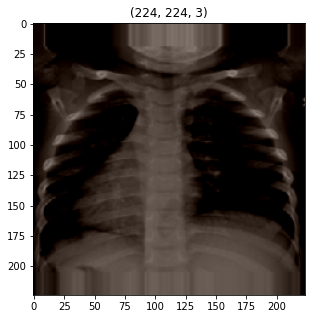

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


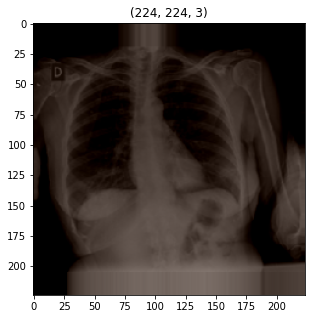

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


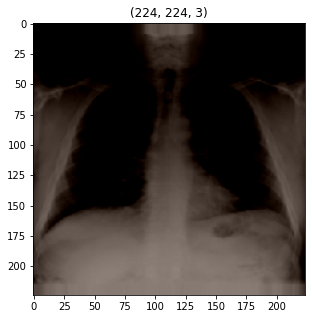

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


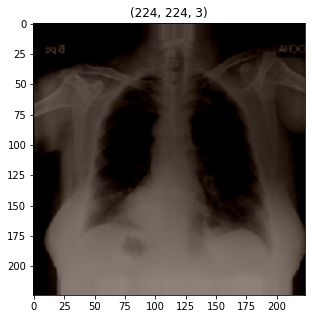

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


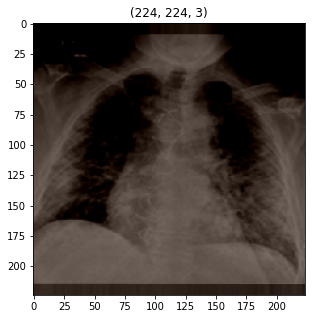

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


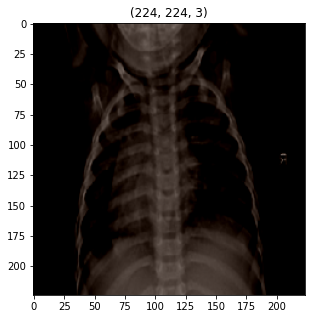

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


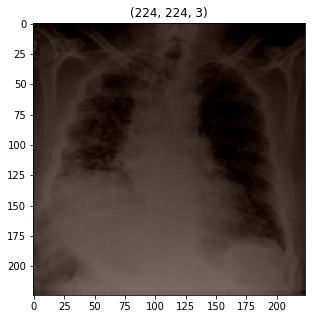

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


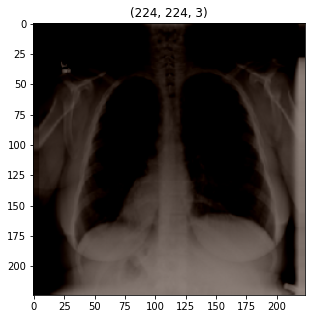

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


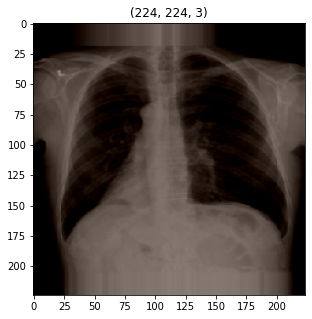

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


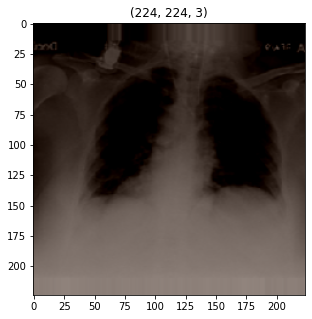

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


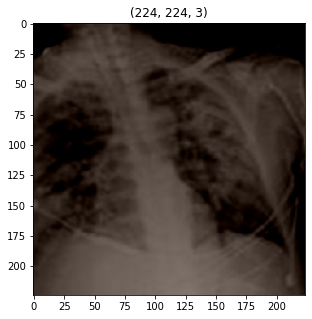

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


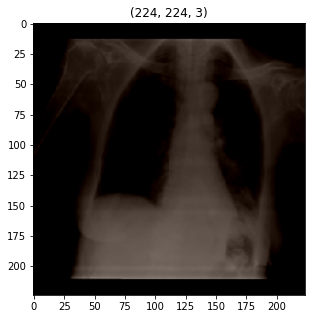

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


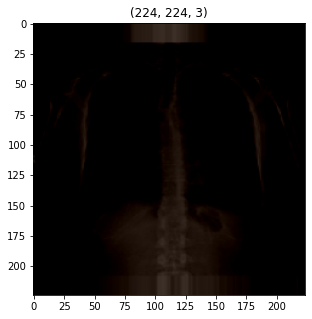

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


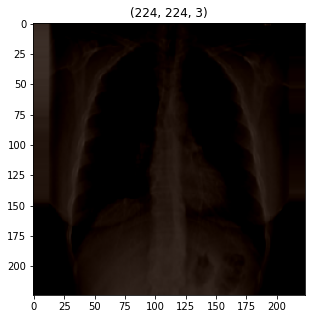

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


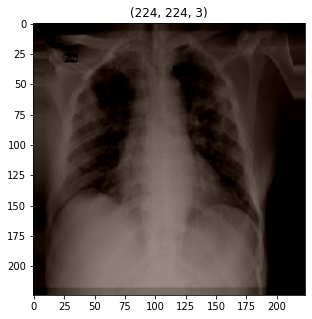

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


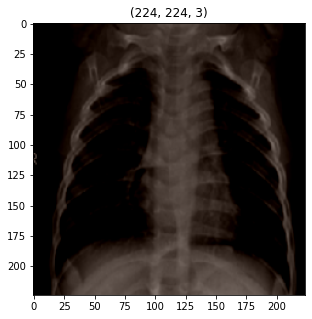

In [13]:
plotImages(t_img, label)

In [14]:
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten , Dense, Dropout , MaxPool2D

In [15]:
vgg = VGG16( input_shape=(224,224,3), include_top= False)

58900480/58889256 [==============================] - 0s 0us/step


In [16]:
for layer in vgg.layers: 
  layer.trainable = False

In [17]:
x = Flatten()(vgg.output)
x = Dense(units=2 , activation='sigmoid', name = 'predictions' )(x)

model = Model(vgg.input, x)

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [20]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [21]:
hist = model.fit(train, steps_per_epoch= 10, epochs= 6, validation_data= valid , validation_steps= 32, callbacks=[es,mc])

Epoch 1/6
10/10 [==============================] - ETA: 0s - loss: 0.8311 - accuracy: 0.6438 WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 32 batches). You may need to use the repeat() function when building your dataset.

Epoch 1: val_accuracy improved from -inf to 0.85516, saving model to bestmodel.h5
10/10 [==============================] - 408s 43s/step - loss: 0.8311 - accuracy: 0.6438 - val_loss: 0.3494 - val_accuracy: 0.8552
Epoch 2/6
10/10 [==============================] - 159s 16s/step - loss: 0.4525 - accuracy: 0.8031
Epoch 3/6
10/10 [==============================] - 160s 16s/step - loss: 0.4637 - accuracy: 0.7969
Epoch 4/6
10/10 [==============================] - 161s 16s/step - loss: 0.3762 - accuracy: 0.8281
Epoch 5/6
10/10 [==============================] - 160s 16s/step - loss: 0.3631 - accuracy: 0.8531
Epoch 6/6
10/10 [==============

In [22]:
from keras.models import load_model
model = load_model("bestmodel.h5")

In [23]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

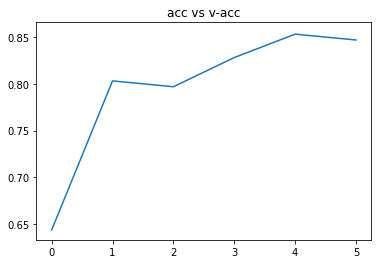

In [24]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

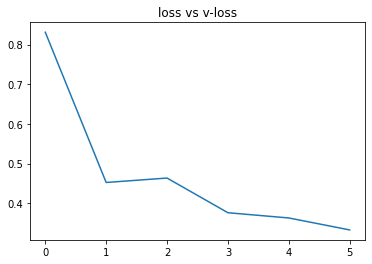

In [25]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [28]:
acc = model.evaluate(test)[1] 
print(f"The accuracy of your model is = {acc} %")

17/17 [==============================] - 259s 15s/step - loss: 0.2115 - accuracy: 0.9244
The accuracy of your model is = 0.9244186282157898 %


In [29]:
from keras.preprocessing import image

def get_img_array(img_path):
  
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)/255
  img = np.expand_dims(img , axis= 0 )
  
  return img

The given X-Ray image is of type = Covid

The chances of image being Covid is : 81.22798204421997 percent

The chances of image being Normal is : 21.084672212600708 percent


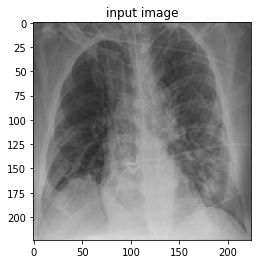

In [35]:
path = "/content/cov19/CovidDataset/Test/Covid/COVID-253.png" 
img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]
print(f"The given X-Ray image is of type = {res}")
print()
print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} percent")
  
plt.imshow(img[0], cmap = "gray")
plt.title("input image")
plt.show()

In [36]:
import tensorflow as tf

In [37]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [38]:
import matplotlib.cm as cm

from IPython.display import Image, display

In [39]:
def save_and_display_gradcam(img_path , heatmap, cam_path="cam.jpg", alpha=0.4):
    
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)
    
    heatmap = np.uint8(255 * heatmap)

    jet = cm.get_cmap("jet")

    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    superimposed_img.save(cam_path)

    display(Image(cam_path))

In [41]:
def image_prediction_and_visualization(path,last_conv_layer_name = "block5_conv3", model = model):
    img_array = get_img_array(path)

    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

    img = get_img_array(path)

    res = class_type[np.argmax(model.predict(img))]
    print(f"The given X-Ray image is of type = {res}")
    print()
    print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} %")
    print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} %")

    print()
    print("image with heatmap representing the covid spot")

    save_and_display_gradcam(path, heatmap)

    print()
    print("the original input image")
    print()

    a = plt.imread(path)
    plt.imshow(a, cmap = "gray")
    plt.title("Original image")
    plt.show()

The given X-Ray image is of type = Normal

The chances of image being Covid is : 10.463255643844604 %
The chances of image being Normal is : 92.70646572113037 %

image with heatmap representing the covid spot


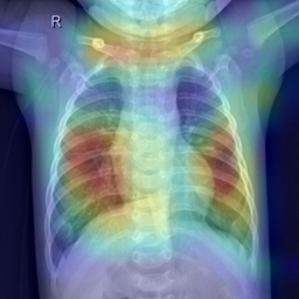


the original input image



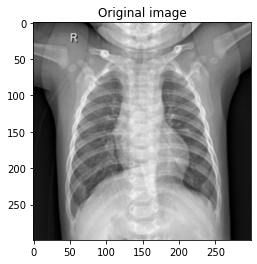

In [43]:
path = "/content/cov19/CovidDataset/Test/Normal/Normal-253.png"

image_prediction_and_visualization(path)